<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0608/0608_01_2_Tensor_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tensorflow 
https://www.tensorflow.org/guide/keras?hl=ko (karas)

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
np.array(1)

array(1)

In [ ]:
# 1. 기본텐서 만들기 
tf.constant(3) # 3은 상수
# 기본텐서는 "스칼라" 또는 "순위-0" 텐서입니다. 스칼라는 단일 값을 포함하며 "축"은 없습니다.
# shape=모양, dtype=데이터타입, numpy=에 뭐가 들어있는지를 나타냄

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [ ]:
tensor = tf.constant([1,2,3])
tensor

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
# tensor -> numpy 
tensor.numpy # tensor는 numpy와 비슷

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>>

In [ ]:
tensor.dtype

tf.int32

In [ ]:
# "벡터" 또는 "순위-1" 텐서
# "벡터" 또는 "순위-1" 텐서는 값의 목록과 같습니다. 벡터에는 하나의 축이 있습니다.
tensor = tf.constant([[1,2,3],[4,5,6]])
tensor # tensor = np.array이다

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [3, 4, 5]], dtype=int32)>

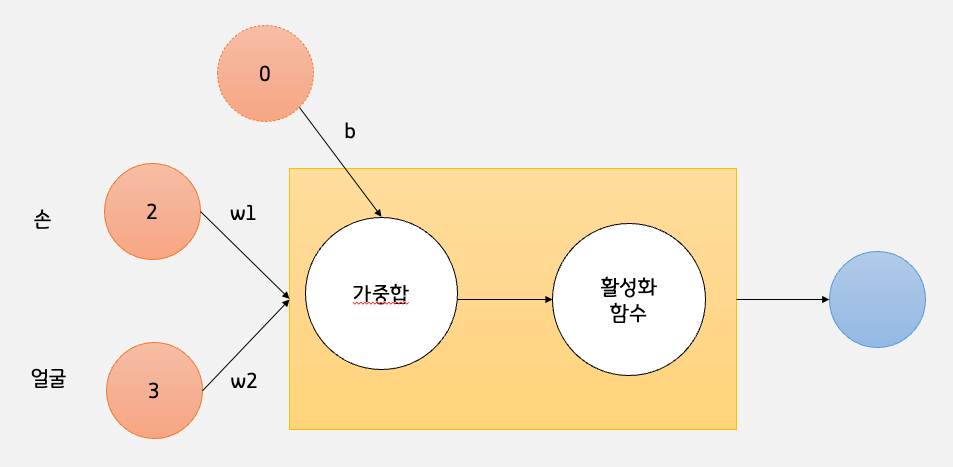

In [ ]:
# 위 그림에서 "가중합" 부분을 tensorflow로 표현해보세요

hand = 2
face = 3
w1, w2, b = 1,1,0 # 초기값 설정

In [ ]:
#선형모델
z = hand*w1 + face*w2 + b
z

5

In [ ]:
# numpy 내적

X = np.array([hand, face, 1])
W = np.array([w1, w2, b]) # numpy는 1차원인 경우 행, 열을 구별하지 않고 계산해줌

#np.dot(X,W)
np.dot(W.T, X) # W.T > T : np.transpose랑 같음, 헷갈리면 2차원으로 맞춰서 계산하면 된다

5

In [ ]:
# 2차원
np.dot(W.reshape(1, -1), X.reshape(-1, 1))

array([[5]])

###.T란?

In [ ]:
W.T # low로 뒤집을 때 T를 사용, np가 1차원일경우 column 벡터가 기본이다

array([1, 1, 0])

In [ ]:
# .T를 알아보자
arr = np.arange(10).reshape(2,5)
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [ ]:
arr.T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [ ]:
np.transpose(arr)

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

### tensorflow 내적

In [ ]:
# 내적 1차원

X = np.array([hand, face, 1])
W = np.array([w1, w2, b])

tf.tensordot(X,W, axes = 1) # 벡터끼리 연산하겠다

<tf.Tensor: shape=(), dtype=int64, numpy=5>

In [ ]:
tf.tensordot?

In [ ]:
tf.tensordot(X, W, axes = 0)

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[2, 2, 0],
       [3, 3, 0],
       [1, 1, 0]])>

In [ ]:
# tensorflow 내적 
X = tf.constant([[hand, face, 1]])
W = tf.constant([[w1, w2, b]])

X@tf.transpose(W) # 연산자 사용 , @나오면 내적한다고 알아들으면 됨
# 연산자는 모델 안에 들어갈 때, 데이터 변경 시 꼬일 확률이 높아서 함수로 명시하는 것이 좋다

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[5]], dtype=int32)>

In [ ]:
# tensorflow 내적 
X = tf.constant([[hand, face, 1]])
W = tf.constant([[w1, w2 ,b]])

In [ ]:
tf.matmul(X,W, transpose_b =True)
# transpose_b : 뒤에 꺼
# transpose_a : 앞에 꺼
# matmul : 내적시 보통 행렬곱이라 제일 많이 쓰나 메트릭스 계산이라 2차원이어야 한다

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[5]], dtype=int32)>

In [ ]:
X = tf.constant([[hand, face, 1]], dtype=tf.float32) # float32가 제일 안정적이라 기본값으로 자주 쓰인다
W = tf.constant([[w1, w2 ,b]], dtype=tf.float32)
# 보통 그냥 만들면 기본값으로 float /32로 설정되데 우리는 임의로 만들어서 int 값으로 설정된 것이다
y_hat = tf.matmul(X,W, transpose_b =True)
y_hat

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[5.]], dtype=float32)>

In [ ]:
# 내적해서 시그모이드 함수를 태우면?
tf.math.sigmoid(y_hat) # y_hat은 데이터가 float여야 한다, int면 1.1, 1.2 이런식의 업데이트가 불가하고 1, 2 이렇게 업데이트 되서 안된다
# = 업데이트 시 기회를 없앨 수 있어서
# 이러한 계산은 내적 > 시그모이드 함수  쓰는 것은 loss 계산이나 원하는 모델이 없을 때 사용한다

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9933072]], dtype=float32)>

### Rank와 Shape

rank와 shape은 무엇이 다를까요? 

In [ ]:
a = tf.constant(10)
b = tf.constant(5, dtype=tf.float32)
c = tf.constant([1., 2.])
d = tf.constant([[1., 2.], [3., 4.]])

In [ ]:
# rank : 차원, 선형대수학의 rank 아님
tf.rank(a), tf.rank(b), tf.rank(c), tf.rank(d)
# ()의 차원수

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

In [ ]:
# shape: 각 차원의 원소 개수
a.shape, b.shape, c.shape, d.shape
# a,b는 스칼라라 원소가 없음

(TensorShape([]), TensorShape([]), TensorShape([2]), TensorShape([2, 2]))

### Constant VS Variable

In [ ]:
# tensor 만드는 방법 1
tensor_c = tf.constant([1., 2.])
tensor_c
# constant : 값이 바뀌지 않는 tensor >> 값을 보호해야 할 때 사용한다
# assign 에러 뜰 수 있다(값을 바꿀 수 없다)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [ ]:
# tensor 만드는 방법 2
tensor_v = tf.Variable([1., 2.])
tensor_v
# Variable : 다른 언어에서는 자주 쓰이나 파이썬에서는 없음
# Variable로 하면 값을 바꿀 수 있다(자주 값을 바꿀 때 사용한다)
# 파라미터는 Varialbe로 만들어야 한다

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [ ]:
# assign : 값 추가
tensor_c.assign([4., 5.])
tensor_c

In [ ]:
tensor_v.assign([4., 5.])
tensor_v

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([4., 5.], dtype=float32)>

### Operator(사칙연산)

In [ ]:
a

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [ ]:
b

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [ ]:
10+5. # 이렇게 하면 float로 바꿔주는데 

15.0

In [ ]:
a+b # tensorflow는 안바꿔준다 >> type 맞춰줘야한다
# int라서 에러

InvalidArgumentError: ignored

In [ ]:
# 형변환 (cast)
a = tf.cast(a, tf.float32)
a

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [ ]:
b

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [ ]:
a / b

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
# 모델 안에서 연산할 때는 함수로 쓴다(연산자 쓰면 모델 안에서 꼬일 수 있다)

In [ ]:
a = tf.cast([1,2,3], tf.float32)
b = tf.cast([4,5,6], tf.float32)
# 계산할 때도 둘다 타입이 동일 해야 한다, 

In [ ]:
# 튜플로 만들어도 동일하다
a = tf.cast(a, tf.float32)
a

In [ ]:
# 타입은 float로 맞춰줘야 한다, 내적 아니고 같은 위치에 있는 것 끼리 연산한다
print(tf.add (a, b)) # 더하기(add)
print(tf.subtract(a,b)) # 빼기(subtract)
print(tf.divide(a,b)) # 나누기(divide)
print(tf.multiply(a,b)) # 곱하기(multiply)

tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)
tf.Tensor([-3. -3. -3.], shape=(3,), dtype=float32)
tf.Tensor([0.25 0.4  0.5 ], shape=(3,), dtype=float32)
tf.Tensor([ 4. 10. 18.], shape=(3,), dtype=float32)


In [ ]:
# +


tf.Tensor(15.0, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(50.0, shape=(), dtype=float32)


In [ ]:
# - 

(<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>)

In [ ]:
# /

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.3, 0.4], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.3, 0.4], dtype=float32)>)

In [ ]:
# * 

(<tf.Tensor: shape=(), dtype=float32, numpy=50.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=50.0>)

In [ ]:
# 데이터 타입이 다르다면 변환시켜줘야 한다
a = tf.cast(a, tf.float32)
a

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([3., 4.], dtype=float32)>)

### Sequence Data

In [ ]:
tf.range(1., 33., 3)

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.],
      dtype=float32)>

In [ ]:
tf.linspace(1.0, 10.0, 10) # 시작부터 끝까지 간격을 동일하게(시작, 끝, 간격)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>

In [ ]:
tf.linspace(1.0, 10.0, 3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 1. ,  5.5, 10. ], dtype=float32)>

In [ ]:
# 중요!! 자주 나온다
tf.zeros((3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
# 중요!! 자주 나온다
tf.ones((2, 2), dtype = tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]], dtype=int32)>

### reduce_*

In [ ]:
# 원래는 이렇게 했다
np.array(0,30).reshape(2,3,5)

In [ ]:
tf.reshape? # 앞에 array 뒤에 tensor를 넣어준다

In [ ]:
# tf.reshape 도 동일하다
# 0, 30, (2, 3, 5), dtype=tf.float32

e = tf.reshape(tf.range(0., 30.), [2, 3, 5])
e

<tf.Tensor: shape=(2, 3, 5), dtype=float32, numpy=
array([[[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.]],

       [[15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.]]], dtype=float32)>

In [ ]:
# np.sum 처럼 tf.sum 안됩니다 tf.reduce_sum!
# 전체를 더하고 싶으면 ? 
tf.reduce_sum(e)
# reduce_ >> 차원을 줄여서 계산하겠다

<tf.Tensor: shape=(), dtype=float32, numpy=435.0>

In [ ]:
# loss 구할 때 사용한다
tf.reduce_sum(e, axis=2, keepdims=True)
# 마지막 차원을 없애면서 2,3,5를 더한것

<tf.Tensor: shape=(2, 3, 1), dtype=float32, numpy=
array([[[ 10.],
        [ 35.],
        [ 60.]],

       [[ 85.],
        [110.],
        [135.]]], dtype=float32)>

In [ ]:
# axis = 어느 축을 없앨까
# keepdims = true인 경우 길이가 1인 축소된 면적을 유지합니다. 처음이니 keepdims를 보고 어떻게 됐는지 확인하면서 계산합시다
tf.reduce_sum(e, axis=1, keepdims=True) 
# 세로방향(low, 행)으로 더한다

<tf.Tensor: shape=(2, 1, 5), dtype=float32, numpy=
array([[[15., 18., 21., 24., 27.]],

       [[60., 63., 66., 69., 72.]]], dtype=float32)>

In [ ]:
tf.reduce_sum(e, axis=0, keepdims=True)
# 두 행렬에서 같은 위치를 더한다

<tf.Tensor: shape=(1, 3, 5), dtype=float32, numpy=
array([[[15., 17., 19., 21., 23.],
        [25., 27., 29., 31., 33.],
        [35., 37., 39., 41., 43.]]], dtype=float32)>

In [ ]:
e = tf.reshape(tf.range(1., 101.), [2, 10, -1])
e

In [ ]:
tf.reduce_sum(e, axis=2, keepdims=True) # 가로방향, 열

In [ ]:
tf.reduce_sum(e, axis=1, keepdims=True) # 세로방향, 행

In [ ]:
tf.reduce_sum(e, axis=0, keepdims=True) # 같은 위치

In [ ]:
# 전체의 평균
tf.reduce_mean(e)

### Random

In [ ]:
a = tf.random.normal((3, 3))
a

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.79575974, -1.7947012 , -1.9405878 ],
       [-0.29704332, -0.41078383,  0.15541644],
       [-1.0037094 , -0.4300832 , -0.45361042]], dtype=float32)>

In [ ]:
b = tf.random.uniform((4, 4))
b

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.06208587, 0.49229705, 0.6164459 , 0.11268342],
       [0.45073032, 0.9489783 , 0.20041394, 0.7748251 ],
       [0.3712616 , 0.76053166, 0.32683396, 0.39122725],
       [0.19280815, 0.76896393, 0.82253635, 0.777295  ]], dtype=float32)>

### 간단한 모델

In [ ]:
# 6월 모의고사, 9월모고, 수능 

# data 
mon6, mon9, final = 85., 100., 95.

# 가설  : final = w1*mon6 + w2*mon9 + b

# 초기 weight 설정
w1 = tf.Variable(0.1)
w2 = tf.Variable(0.2)
b = tf.Variable(-0.5)

# Cost Function
def myCost():
    # 예측값
    y_pred = w1*mon6 + w2*mon9 + b 

    # Loss (실제값 - 예측값)^2 
    loss = tf.square(final - y_pred) # square = 제곱
    return loss 

# optimzer 
opt = tf.keras.optimizers.Adam(learning_rate = 0.1)
# weight를 찾아오는 것은 Adam으로 사용하겠다

# 학습
EPOCH = 100
for i in range(EPOCH):
    opt.minimize(myCost, var_list = [w1, w2, b]) 
    # 최소화 : minimize , opt(optimizers)에게 코스트 펑션을 최소화 하는 w1, w2, b를 찾아와라
    
    print(f"Epoch : {i} \
    - Loss : {myCost().numpy()} \
    - w1 : {w1.numpy()} \
    - w2 : {w2.numpy()} \
    - b : {b.numpy()}")

In [ ]:
w1*mon6 + w2*mon9 + b  # 찾아온 weight로 실제 어떻게 예측하나

<tf.Tensor: shape=(), dtype=float32, numpy=95.280914>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np 
import random 

a, b = 2, -5
rng = np.random.RandomState(1)
X = 10*rng.rand(50)
y = a*X + b + rng.randn(50) # 분산 추가 

In [ ]:
X.shape

(50,)

In [ ]:
y.shape

(50,)

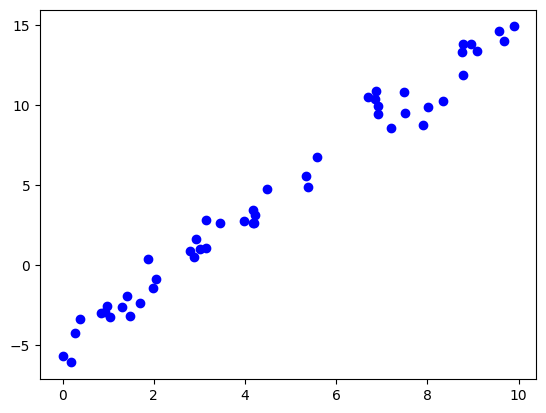

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(X, y, 'bo')

In [ ]:
# data 
a, b = 2, -5
rng = np.random.RandomState(1)
X = 10*rng.rand(50)
y = a*X + b + rng.randn(50) # 분산 추가 

# 가설  : y = a*X + b  

# 초기 weight 설정
w1 = tf.Variable(1.0)
b = tf.Variable(-1.0)

# Cost Function
def myCost():
    # 예측값
    y_pred = w1*X + b

    # Loss  = MSE(제곱평균 오차)
    error = y - y_pred
    loss = tf.reduce_mean(error**2) # 오차의 제곱의 평균
    return loss 

# optimzer 
opt = tf.keras.optimizers.Adam(learning_rate = 0.1)
# weight를 찾아오는 것은 Adam으로 사용하겠다

# 학습
EPOCH = 100
for i in range(EPOCH):
    opt.minimize(myCost, var_list = [w1, b]) 
    # 최소화 : minimize , opt(optimizers)에게 코스트 펑션을 최소화 하는 w1, w2, b를 찾아와라

    print(f"Epoch : {i} \
    - Loss : {myCost().numpy():.4f} \
    - w1 : {w1.numpy()} \
    - b : {b.numpy()}")

Epoch : 0     - Loss : 8.8839     - w1 : 1.1000022888183594     - b : -0.899997889995575
Epoch : 1     - Loss : 7.3232     - w1 : 1.1980141401290894     - b : -0.8149248361587524
Epoch : 2     - Loss : 6.4820     - w1 : 1.291558861732483     - b : -0.7757955193519592
Epoch : 3     - Loss : 6.1312     - w1 : 1.3772903680801392     - b : -0.7904318571090698
Epoch : 4     - Loss : 6.0756     - w1 : 1.4514787197113037     - b : -0.837600827217102
Epoch : 5     - Loss : 6.1410     - w1 : 1.5107980966567993     - b : -0.9026361703872681
Epoch : 6     - Loss : 6.1774     - w1 : 1.5533705949783325     - b : -0.9784862399101257
Epoch : 7     - Loss : 6.0935     - w1 : 1.5793040990829468     - b : -1.0615615844726562
Epoch : 8     - Loss : 5.8686     - w1 : 1.5903507471084595     - b : -1.1497665643692017
Epoch : 9     - Loss : 5.5353     - w1 : 1.5891611576080322     - b : -1.2416694164276123
Epoch : 10     - Loss : 5.1517     - w1 : 1.5786921977996826     - b : -1.3361314535140991
Epoch : 11  

In [ ]:
a*X + b 

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([ 3.316214  ,  9.382265  , -5.0219383 ,  1.0224257 , -2.089108  ,
       -3.177454  , -1.2990215 ,  1.8869886 ,  2.9111238 ,  5.752109  ,
        3.3596644 ,  8.680164  , -0.93518066, 12.538124  , -4.476474  ,
        8.385124  ,  3.3218703 ,  6.149571  , -2.216487  , -1.062196  ,
       10.990665  , 14.341007  ,  1.2442579 ,  8.8222275 , 12.503557  ,
       12.8679085 , -3.3233414 , -4.24313   , -1.6276174 , 12.538626  ,
       -3.0572891 ,  3.3979268 , 14.133566  ,  5.6390796 ,  8.813316  ,
        1.286087  ,  8.705793  , 11.668287  , -4.65846   ,  9.978661  ,
       14.752996  ,  9.939087  ,  0.58465433, 10.76136   , -2.9597056 ,
        3.9336448 , 13.147684  ,  0.84805727,  0.7312813 , -2.4236543 ],
      dtype=float32)>

In [ ]:
# 위 코드를 응용해서 모델을 학습시켜보세요 
# 가설  : y = a*X + b  
# y_hat = aX + b

# 데이터
rng = np.random.RandomState(1)
X = 10*rng.rand(50)
y = a*X + b + rng.randn(50)

# 가중치 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# cost Function
def computer_loss():
    # 예측값
    y_pred = a*X + b

    # MSE
    error = y - y_pred
    loss = tf.reduce_mean(error**2)
    return loss

# optimzer 
opt = tf.keras.optimizers.Adam(learning_rate = 0.1)

epoch = 1501
for i in range(epoch):
    opt.minimize(computer_loss, var_list = [a, b]) 

    if i % 100 == 0:
        print(f"Epoch : {i} \
        - Loss : {computer_loss().numpy():.4f} \
        - a : {a.numpy() :.2f} \
        - b : {b.numpy():.2f}")


Epoch : 0         - Loss : 6.6926         - a : 0.58         - b : 0.62
Epoch : 100         - Loss : 0.8184         - a : 1.00         - b : 0.70
Epoch : 200         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 300         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 400         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 500         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 600         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 700         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 800         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 900         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 1000         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 1100         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 1200         - Loss : 0.8183         - a : 1.00         - b : 0.70
Epoch : 1300         - Loss : 0.8183 

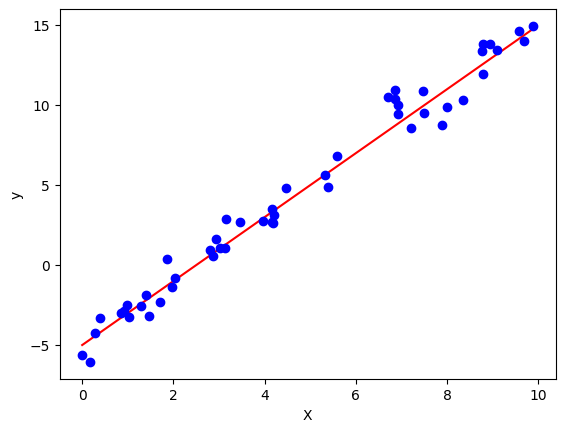

In [ ]:
import matplotlib.pyplot as plt 
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다. 
plt.plot(line_x, line_y, 'r-')
plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.show()